# Adatbeolvasás

In [2]:
# 📦 Szükséges csomagok importálása
import pandas as pd
import numpy as np

print("Csomagok betöltve, készen állunk!")


Csomagok betöltve, készen állunk!


In [3]:
# 📂 CSV fájlok helye
csv_path = "/home/g14/sze_adatelemzes/f1/database"

# CSV fájlok beolvasása
versenyzok = pd.read_csv(f"{csv_path}/f1_dataset_versenyzok.csv")
konstruktorok = pd.read_csv(f"{csv_path}/f1_dataset_konstruktorok.csv")
helyszinek = pd.read_csv(f"{csv_path}/f1_dataset_helyszinek.csv")
idojarasi_korulmenyek = pd.read_csv(f"{csv_path}/f1_dataset_idojarasi_korulmenyek.csv")
autok = pd.read_csv(f"{csv_path}/f1_dataset_autok.csv")
szezonok = pd.read_csv(f"{csv_path}/f1_dataset_szezonok.csv")
futamok = pd.read_csv(f"{csv_path}/f1_dataset_futamok.csv")
helyezesek = pd.read_csv(f"{csv_path}/f1_dataset_helyezesek.csv")

print("CSV fájlok sikeresen betöltve!")


CSV fájlok sikeresen betöltve!


In [4]:
# 📊 Versenyzők táblázat előnézete
display(versenyzok.head())

,versenyzo_id,keresztnev,vezeteknev,orszag,beszelt_nyelv,konstruktor_id,szuletesi_datum,kod
0,1,Lewis,Hamilton,Egyesult Kiralysag,angol,1,1985-01-07,HAM
1,2,Nick,Heidfeld,Nemetorszag,nemet,2,1977-05-10,HEI
2,3,Nico,Rosberg,Nemetorszag,nemet,2,1985-06-27,ROS
3,4,Fernando,Alonso,Spanyolorszag,spanyol,164,1981-07-29,ALO
4,5,Heikki,Kovalainen,Finnorszag,finn,136,1981-10-19,KOV


# Típuskonverziók

In [5]:
# 🔄 Adattípus konverziók

#  A 'szuletesi_datum' oszlopot datetime típusra konvertáljuk.
#  Ha az érték nem konvertálható, NaT lesz (errors="coerce").
versenyzok["szuletesi_datum"] = pd.to_datetime(
    versenyzok["szuletesi_datum"], errors="coerce"
)

#  A 'datum' oszlopot datetime típusú dátummá konvertáljuk.
#  Csak a dátumot tartjuk meg (.dt.date), az időt eldobjuk.
futamok["datum"] = pd.to_datetime(futamok["datum"], errors="coerce").dt.date

#  Az 'ido' oszlopot datetime típusú idővé konvertáljuk a "%H:%M:%S" formátum szerint.
#  Csak az időt tartjuk meg (.dt.time).
futamok["ido"] = pd.to_datetime(
    futamok["ido"], format="%H:%M:%S", errors="coerce"
).dt.time

#  A 'ev' oszlopot datetime formátumra konvertáljuk, csak az év alapján.
#  Ha csak az év szerepel, január 1. lesz automatikusan hozzárendelve.
szezonok["ev"] = pd.to_datetime(
    szezonok["ev"], format="%Y", errors="coerce"
)

#  A 'verseny_ido' oszlopot datetime típusú idővé konvertáljuk a "%H:%M:%S" formátum szerint.
#  Csak az időt tartjuk meg (.dt.time).
helyezesek["verseny_ido"] = pd.to_datetime(
    helyezesek["verseny_ido"], format="%H:%M:%S", errors="coerce"
).dt.time

# Kiírás a felhasználónak, hogy minden konverzió sikeresen végrehajtva
print("Adattípus konverziók sikeresen végrehajtva!")

# Futamok - legelső és legutolsó dátum
print("Futamok legelső dátuma:", futamok["datum"].min())
print("Futamok legutolsó dátuma:", futamok["datum"].max())

# Versenyzők születési dátuma - legelső és legutolsó
print("Versenyzők legkorábbi születési dátuma:", versenyzok["szuletesi_datum"].min())
print("Versenyzők legkésőbbi születési dátuma:", versenyzok["szuletesi_datum"].max())


Adattípus konverziók sikeresen végrehajtva!
Futamok legelső dátuma: 1950-05-13
Futamok legutolsó dátuma: 2022-11-20
Versenyzők legkorábbi születési dátuma: 1896-12-28 00:00:00
Versenyzők legkésőbbi születési dátuma: 2000-05-11 00:00:00


# Formátum ellenőrzés

In [6]:
# ✅ Ellenőrzés: adattípusok megtekintése
print("Versenyzők:\n", versenyzok.dtypes, "\n")
print("Futamok:\n", futamok.dtypes, "\n")
print("Szezonok:\n", szezonok.dtypes, "\n")
print("Helyezések:\n", helyezesek.dtypes, "\n")


Versenyzők:
 versenyzo_id                int64
keresztnev                 object
vezeteknev                 object
orszag                     object
beszelt_nyelv              object
konstruktor_id              int64
szuletesi_datum    datetime64[ns]
kod                        object
dtype: object 

Futamok:
 futam_id                           int64
szezon_id                          int64
helyszin_id                        int64
datum                             object
ido                       datetime64[ns]
idojarasi_korulmeny_id             int64
dtype: object 

Szezonok:
 szezon_id             int64
ev           datetime64[ns]
dtype: object 

Helyezések:
 helyezes_id         int64
versenyzo_id        int64
elert_helyezes    float64
pole_poz            int64
verseny_ido        object
szezon_id           int64
futam_id            int64
auto_id           float64
konstruktor_id      int64
korok_szama         int64
dtype: object 



# Statisztikai jellemzők

In [7]:
# Listázunk minden DataFrame-et egy szótárban
dfs = {
    "versenyzok": versenyzok,
    "konstruktorok": konstruktorok,
    "helyszinek": helyszinek,
    "idojarasi_korulmenyek": idojarasi_korulmenyek,
    "autok": autok,
    "szezonok": szezonok,
    "futamok": futamok,
    "helyezesek": helyezesek
}

# Minden DataFrame statisztikai jellemzőinek kiíratása
for name, df in dfs.items():
    print(f"Tábla neve: {name}")
    print(f"Sorok és oszlopok: {df.shape}")
    print("\n")

Tábla neve: versenyzok
Sorok és oszlopok: (854, 8)


Tábla neve: konstruktorok
Sorok és oszlopok: (212, 4)


Tábla neve: helyszinek
Sorok és oszlopok: (76, 4)


Tábla neve: idojarasi_korulmenyek
Sorok és oszlopok: (9, 2)


Tábla neve: autok
Sorok és oszlopok: (565, 6)


Tábla neve: szezonok
Sorok és oszlopok: (73, 2)


Tábla neve: futamok
Sorok és oszlopok: (1079, 6)


Tábla neve: helyezesek
Sorok és oszlopok: (25660, 10)




# Lekérdezések

## 1. Listázza ki azokat a pilótákat, akik pole pozícióból kerültek dobogós helyre a 2019-es szezonban!

In [8]:
# Merge: helyezesek + szezonok (2019-re szűrés)
merged = helyezesek.merge(szezonok, on="szezon_id")

# Oszlopok ellenőrzése
print(merged.columns.tolist())

# Szűrés: 2019, dobogó, pole
filtered = merged[
    (merged["ev"].dt.year == 2019) &   # szezon 2019
    (merged["elert_helyezes"] <= 3) &  # dobogó
    (merged["pole_poz"] == 1)          # pole pozíció
]

# Merge (összekapcsolás) a 'filtered' DataFrame és a 'versenyzok' DataFrame között
# a 'versenyzo_id' oszlop alapján, hogy megkapjuk a versenyzők nevét
result = filtered.merge(versenyzok, on="versenyzo_id")

# Új oszlop létrehozása 'Nev' néven, ahol a kereszt- és vezetéknév össze van fűzve
result["Nev"] = result["keresztnev"] + " " + result["vezeteknev"]

# Csak a különböző neveket hagyjuk meg (DISTINCT)
# A reset_index(drop=True) eltávolítja a régi indexet, újrakezdi 0-tól
pilota_lista = result["Nev"].drop_duplicates().reset_index(drop=True)

# 4. Az eredmény megjelenítése
display(pilota_lista)



['helyezes_id', 'versenyzo_id', 'elert_helyezes', 'pole_poz', 'verseny_ido', 'szezon_id', 'futam_id', 'auto_id', 'konstruktor_id', 'korok_szama', 'ev']


0      Max Verstappen
1     Charles Leclerc
2    Sebastian Vettel
3      Lewis Hamilton
4     Valtteri Bottas
Name: Nev, dtype: object

## 2. Listázza ki azon autókat, melyeknek teljesítménye 700 és 800 kW közé esik!


In [9]:
# Győződjünk meg róla, hogy a teljesítmény numerikus
autok["teljesitmeny"] = pd.to_numeric(autok["teljesitmeny"], errors="coerce")

# Szűrés: teljesítmény 700–800 kW
filtered_autok = autok[(autok["teljesitmeny"] >= 700) & (autok["teljesitmeny"] <= 800)]

# Csak az oszlopok, amik érdekelnek, és rendezés csökkenő sorrendben
result = (
    # Kiválasztjuk a 'nev' és 'teljesitmeny' oszlopokat a 'filtered_autok' DataFrame-ből
    filtered_autok[["nev", "teljesitmeny"]]
    
    # Sorba rendezzük a DataFrame-et a 'teljesitmeny' oszlop szerint csökkenő sorrendben
    .sort_values(by="teljesitmeny", ascending=False)
    
    # Újraindexeljük a DataFrame-et 0-tól kezdődő sorszámozással, a régi indexet eldobva
    .reset_index(drop=True)
)

display(result)


,nev,teljesitmeny
0,T16,798
1,D2,797
2,RS01,795
3,1,795
4,RB14,795
...,...,...
93,VJM08B,702
94,PC3,702
95,21,701
96,FW28B,701


## 3. Ki volt a legeredményesebb konstruktőr csapatfőnöke a 2003 és 2007 közötti versenyszezonok intervallumában?

In [10]:
# Győződjünk meg róla, hogy az 'ev' oszlop datetime
szezonok["ev"] = pd.to_datetime(szezonok["ev"], errors="coerce")

# Merge helyezesek + szezonok
merged = helyezesek.merge(szezonok, on="szezon_id")

# Oszlopok ellenőrzése
print(merged.columns.tolist())

# Szűrés: 2003-2007 közötti szezonok és első helyezés
filtered = merged[
    (merged["ev"].dt.year >= 2003) &
    (merged["ev"].dt.year <= 2007) &
    (merged["elert_helyezes"] == 1)
]

# Merge konstruktorok a csapatvezető nevéhez
merged_final = filtered.merge(
    konstruktorok[["konstruktor_id", "csapatvezeto"]],
    on="konstruktor_id"
)

# Csoportosítás és számolás
result = (
    # Csoportosítás a 'merged_final' DataFrame-ben a 'csapatvezeto' oszlop szerint
    # Ez a konstruktor csapatfőnök neve
    merged_final.groupby("csapatvezeto")["elert_helyezes"]
    
    # Megszámolja az egyes csapatfőnökökhöz tartozó sorok számát,
    # vagyis hány versenyt nyertek (minden első helyezés)
    .count()
    
    # Az eredményt átalakítjuk DataFrame-é, és az új oszlopot 'db'-nek nevezzük
    .reset_index(name="db")
    
    # Csökkenő sorrendbe rendezzük a győzelmek számát
    .sort_values(by="db", ascending=False)
    
    # Csak az első sort tartjuk meg, ami a legeredményesebb csapatfőnök
    .head(1)
)

# Megjelenítjük az eredményt
display(result)



['helyezes_id', 'versenyzo_id', 'elert_helyezes', 'pole_poz', 'verseny_ido', 'szezon_id', 'futam_id', 'auto_id', 'konstruktor_id', 'korok_szama', 'ev']


,csapatvezeto,db
4,Thea Beach,42


## 4. Számítsa ki a különböző időjárási viszonyok között rendezett futamok számát!

In [11]:
# Merge futamok és idojarasi_korulmenyek a nev oszlophoz
merged = futamok.merge(
    idojarasi_korulmenyek[["idojarasi_korulmeny_id", "nev"]],
    on="idojarasi_korulmeny_id"
)

# Oszlopok ellenőrzése
print(merged.columns.tolist())

# Csoportosítás és számolás
result = (
    # Csoportosítás a 'merged' DataFrame-ben a 'nev' oszlop szerint
    # Ez az időjárási viszony neve (pl. 'paras', 'esos', stb.)
    merged.groupby("nev")["idojarasi_korulmeny_id"]
    
    # Megszámolja az egyes csoportokban hány sor van,
    # vagyis hány futamot tartalmaz az adott időjárási viszony
    .count()
    
    # Az eredményt átalakítjuk DataFrame-é, és az új oszlopot 'db'-nek nevezzük
    .reset_index(name="db")
    
    # Csökkenő sorrendbe rendezzük az időjárási viszonyok szerinti futamszámot
    .sort_values(by="db", ascending=False)
)

# Megjelenítjük az eredményt
display(result)



['futam_id', 'szezon_id', 'helyszin_id', 'datum', 'ido', 'idojarasi_korulmeny_id', 'nev']


,nev,db
3,kodos,137
0,eso,135
8,villam,127
4,napos,124
5,paras,118
6,szaraz,118
2,felhoszakadas,116
7,vihar,107
1,felhos,97


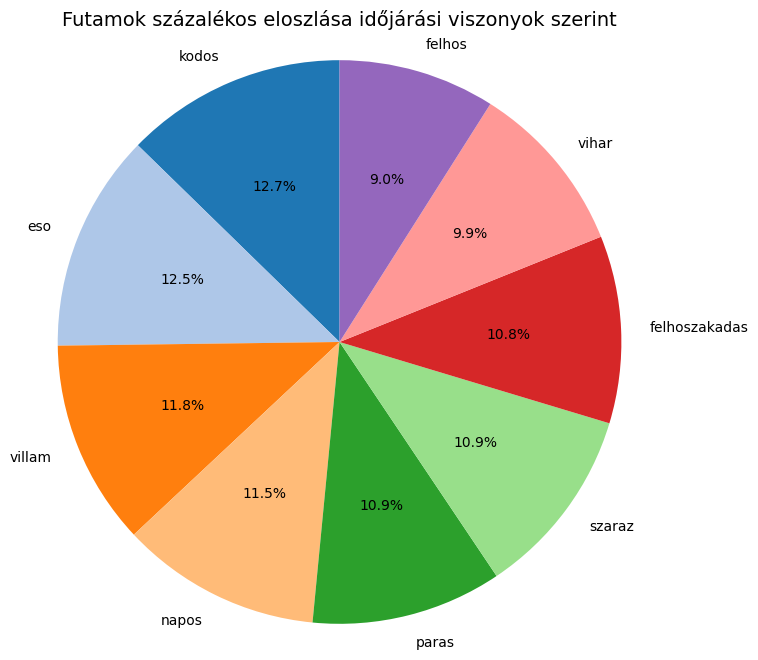

In [ ]:
import matplotlib.pyplot as plt  

# Adatok a diagramhoz
labels = result["nev"] # Az 'nev' oszlopot választjuk ki, ami az időjárási viszonyok neveit tartalmazza (pl. 'szaraz', 'esos')
sizes = result["db"] # A 'db' oszlopot választjuk ki, ami az egyes időjárási viszonyokhoz tartozó futamok számát tartalmazza

# Figure (ábra) beállítása
plt.figure(figsize=(8,8)) # Új ábra létrehozása

# Kördiagram létrehozása
plt.pie(
    sizes, # A szeletek méreteit tartalmazó adatok (futamok száma)
    labels=labels, # A szeletekhez tartozó feliratok (időjárási viszonyok neve)
    autopct='%1.1f%%', # Az értékek százalékos formában történő megjelenítése, 1 tizedesjegy pontossággal
    startangle=90, # A kördiagram kiinduló szöge 90 fok, így a diagram az óramutató járásával kezdődik felülről
    colors=plt.cm.tab20.colors # A szeletek színei a matplotlib 'tab20' színskálájából kerülnek kiválasztásra
)

# Diagram címe
plt.title("Futamok százalékos eloszlása időjárási viszonyok szerint", fontsize=14)  # Cím megadása és betűméret

# Equal aspect ratio
plt.axis('equal') # Az x és y tengely arányának egyenlővé tétele, hogy a kör valóban kör legyen, ne ellipszis

# Megjelenítés
plt.show() # A diagram megjelenítése


## 5. Melyik 5, a konstruktőrök alapítási helye szerinti ország rendelkezik a legtöbb győzelemmel?


In [13]:
# Szűrés: csak az 1. helyezések
wins = helyezesek[helyezesek["elert_helyezes"] == 1]

# Merge a konstruktorokkal, hogy megkapjuk az országot
merged = wins.merge(konstruktorok[["konstruktor_id", "orszag"]], on="konstruktor_id")

# Oszlopok ellenőrzése
print(merged.columns.tolist())

# Győzelmek száma országonként
result = (
    # Csoportosítjuk a 'merged' DataFrame-et az 'orszag' oszlop szerint
    merged.groupby("orszag")
    
    # Minden csoportban megszámoljuk a sorok számát (itt ez a győzelmek száma)
    .size()
    
    # Átalakítjuk DataFrame-é, és az új oszlopot elnevezzük 'Gyozelmek_szama'-nak
    .reset_index(name="Gyozelmek_szama")
    
    # Csökkenő sorrendbe rendezzük a győzelmek száma szerint
    .sort_values("Gyozelmek_szama", ascending=False)
    
    # Csak az első 5 sort tartjuk meg (legtöbb győzelem)
    .head(5)
)

# Eredmény megjelenítése
display(result)


['helyezes_id', 'versenyzo_id', 'elert_helyezes', 'pole_poz', 'verseny_ido', 'szezon_id', 'futam_id', 'auto_id', 'konstruktor_id', 'korok_szama', 'orszag']


,orszag,Gyozelmek_szama
2,Egyesult Kiralysag,494
8,Olaszorszag,281
7,Nemetorszag,126
0,Ausztria,84
3,Franciaorszag,54


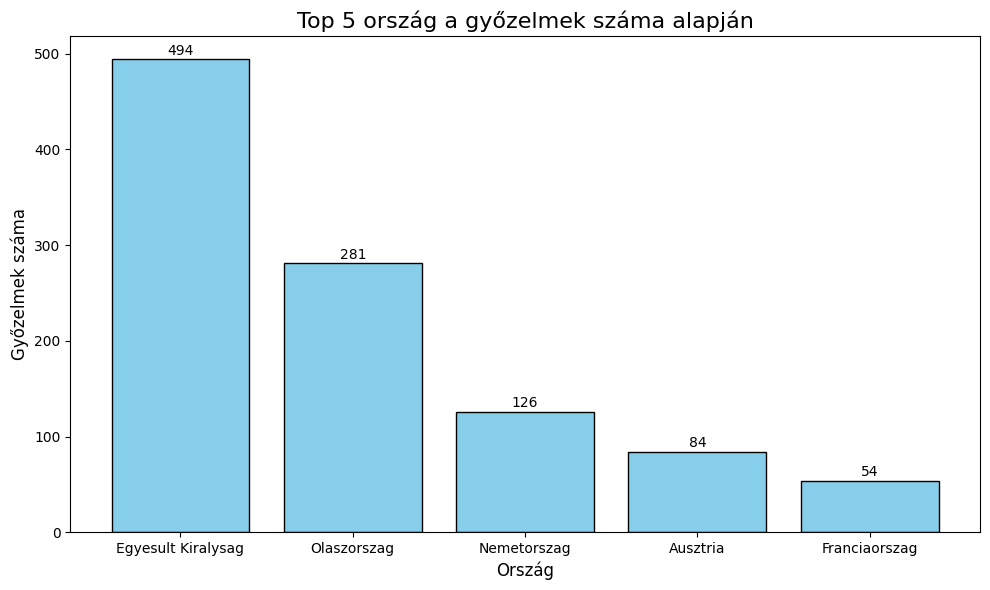

In [ ]:
# Adatok kiválasztása a diagramhoz
countries = result["orszag"]          # Az országneveket tartalmazó oszlopot választjuk ki az x-tengelyhez
wins = result["Gyozelmek_szama"]      # A győzelmek számát tartalmazó oszlopot választjuk ki az y-tengelyhez

# Figure (ábra) létrehozása
plt.figure(figsize=(10,6))  # Új ábra létrehozása

# Oszlopdiagram készítése
plt.bar(
    countries,                # x-tengely: országok
    wins,                     # y-tengely: győzelmek száma
    color='skyblue',          # Oszlopok belső színe világoskék
    edgecolor='black'         # Oszlopok szélét fekete színnel rajzoljuk ki
)

# Diagram címe és tengelyfeliratok
plt.title("Top 5 ország a győzelmek száma alapján", fontsize=16)  # Diagram főcíme
plt.xlabel("Ország", fontsize=12) # x-tengely felirat
plt.ylabel("Győzelmek száma", fontsize=12) # y-tengely felirat

# Az oszlopok tetejére kiírjuk a győzelmek számát
for i, v in enumerate(wins): # Végigmegyünk az összes győzelmi értéken, i az index, v az érték
    plt.text(
        i, # x-koordináta (oszlop helye)
        v + 5, # y-koordináta (oszlop teteje + 5 egység, hogy ne lógjon rá)
        str(v), # Kiírandó szöveg, az érték karakterként
        ha='center', # Középre igazítás
        fontsize=10 # Szöveg betűmérete
    )

# Diagram megjelenítése
plt.tight_layout()   # Automatikusan beállítja a margókat, hogy a címek és feliratok ne legyenek levágva
plt.show()           # Megjeleníti a diagramot
